In [1]:
from trajectory_analysis import *

c:\Users\Melissa Wang\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Melissa Wang\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\configuration_utils.py:335: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [2]:
embed_path = "saved_embeds/conversation_embeddings2.pkl"
speakers = ["don", "teddy"]
audio_folder = "bugonia audio"

if os.path.exists(embed_path):
    embeddings_dict = load_embeddings(embed_path)
    print(f"Loaded embeddings from {embed_path}")
else:
    print("Creating new embeddings...")
    embeddings_dict = embed_audio_scene(audio_folder, speakers)
    save_embeddings(embeddings_dict, embed_path)
    print(f"Saved new embeddings to {embed_path}")


Loaded embeddings from saved_embeds/conversation_embeddings2.pkl


In [3]:
emotional_dict = run_emotional_layers(embeddings_dict, speakers[0], speakers[1])

In [4]:
annotations = load_annotations_txt("annotations/bugonia_ant.txt", speakers)
for speaker, utt_dict in annotations.items():
    print(f"Speaker: {speaker}")
    for utt_idx, text in utt_dict.items():
        print(f"  Utterance {utt_idx + 1}: {text}")
    print("-" * 30)

Speaker: don
  Utterance 4: unsure
  Utterance 12: unsure again
  Utterance 13: expresses concern
------------------------------
Speaker: teddy
  Utterance 2: implies only hes there for don
  Utterance 7: implies he knows whats best
  Utterance 11: says source is trust me bro
  Utterance 12: claims important again
  Utterance 13: implies he knows best again
------------------------------


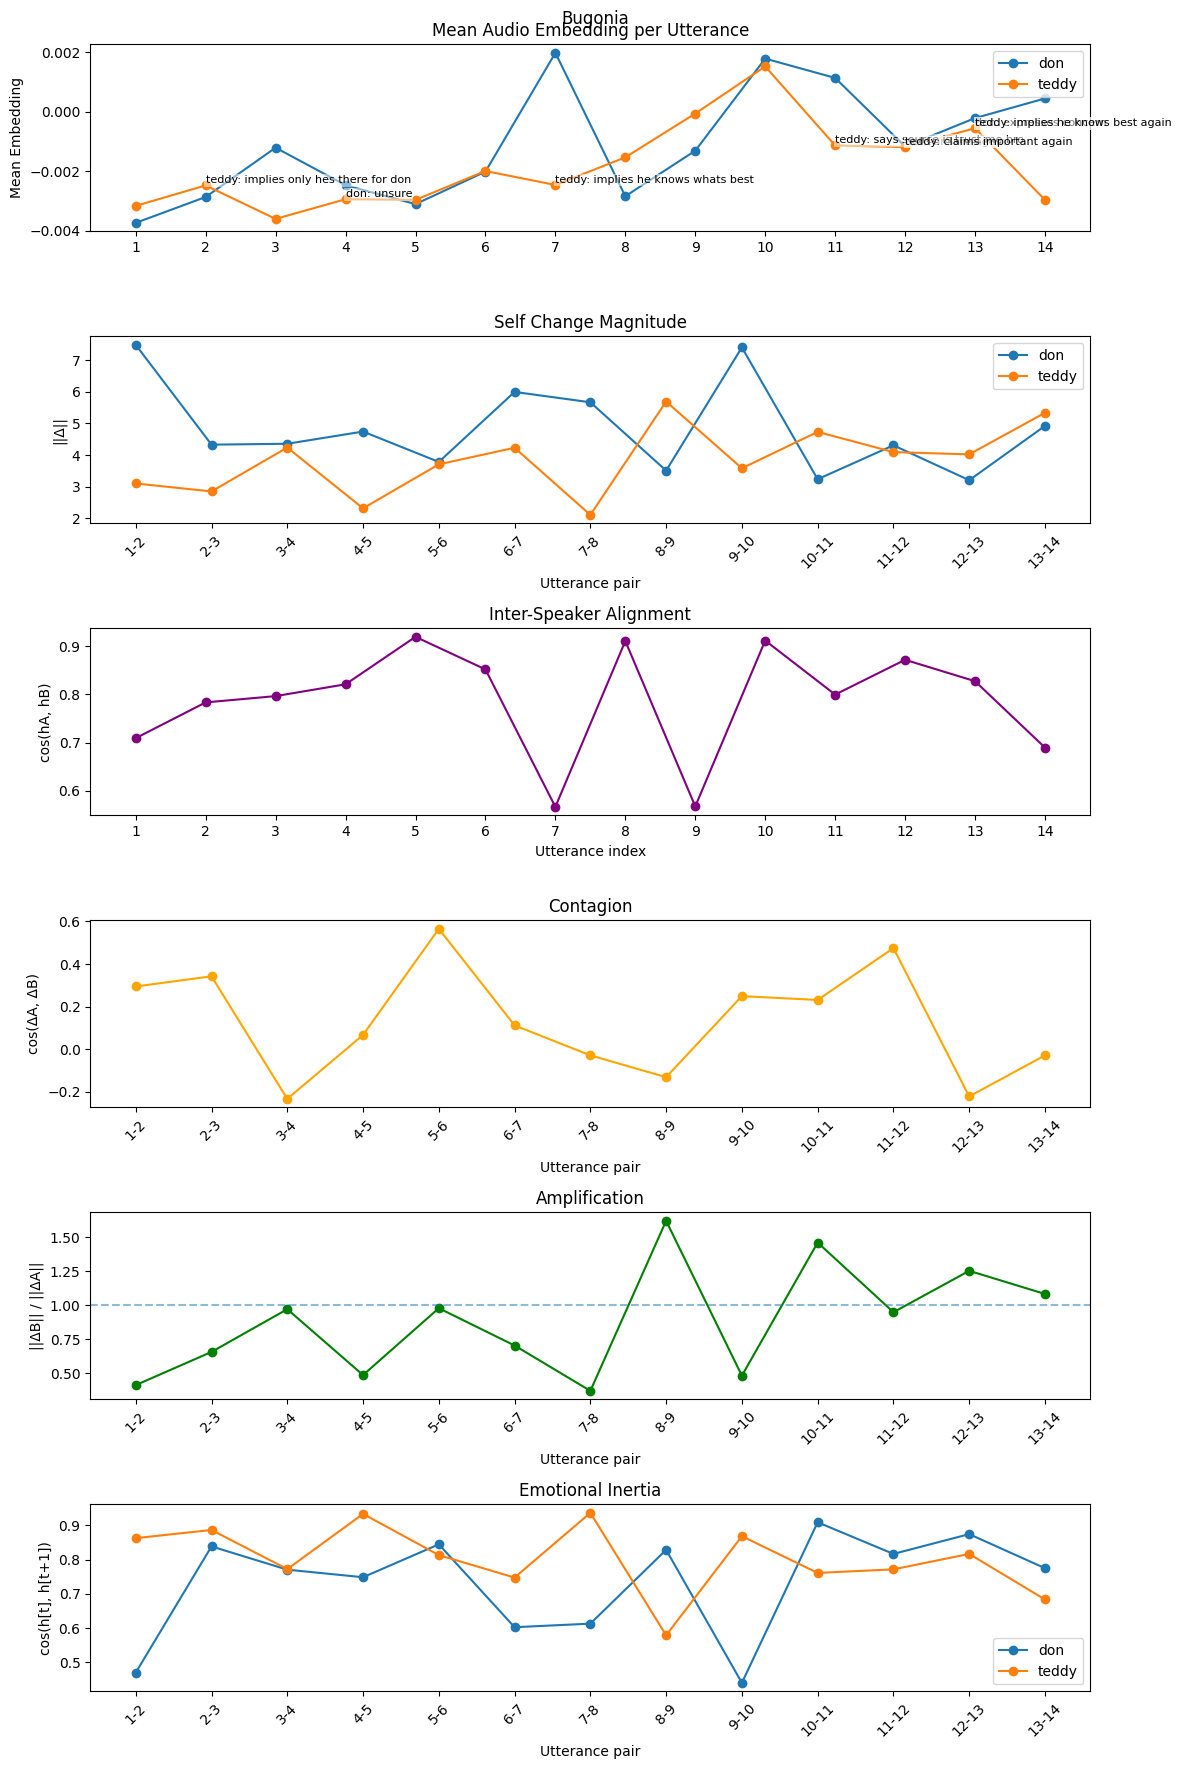

In [5]:
plot_emotional_layers(emotional_dict, speakers, scene_name="Bugonia", annotations=annotations, embedding_dict=embeddings_dict)

In [6]:
generate_scene_summary_with_trends(emotional_dict, speakers)

don: volatile, experiences noticeable emotional shifts.
Reasoning:
mean_delta=4.84 > 4.542342846210186, mean_inertia=0.73 < 0.7819275243924214
max_delta=7.48 > 4.542342846210186
Per-utterance trends:
  larger than usual shift: utterances 1, 4, 6, 7, 9, 13
  high response magnitude: utterances 3, 13
  high alignment between speakers: utterances 5, 10, 11
  notable_shift: utterances 1, 4, 6, 7, 9, 13
--------------------------------------------------
teddy: stable, experiences noticeable emotional shifts.
Reasoning:
mean_inertia=0.80 > 0.7819275243924214, mean_delta=3.85 < 4.542342846210186
max_delta=5.69 > 4.542342846210186
Per-utterance trends:
  larger than usual shift: utterances 8, 10, 13
  high response magnitude: utterances 3, 8, 10, 11, 13
  high alignment between speakers: utterances 5, 10, 11
  low change: utterances 4, 7
  notable_shift: utterances 8, 10, 13
--------------------------------------------------


{'don': {'summary': 'don: volatile, experiences noticeable emotional shifts.',
  'reasoning': 'mean_delta=4.84 > 4.542342846210186, mean_inertia=0.73 < 0.7819275243924214\nmax_delta=7.48 > 4.542342846210186',
  'trends': {'larger than usual shift': [0, 3, 5, 6, 8, 12],
   'high response magnitude': [2, 12],
   'high alignment between speakers': [4, 9, 10],
   'low change': [],
   'notable_shift': [0, 3, 5, 6, 8, 12]}},
 'teddy': {'summary': 'teddy: stable, experiences noticeable emotional shifts.',
  'reasoning': 'mean_inertia=0.80 > 0.7819275243924214, mean_delta=3.85 < 4.542342846210186\nmax_delta=5.69 > 4.542342846210186',
  'trends': {'larger than usual shift': [7, 9, 12],
   'high response magnitude': [2, 7, 9, 10, 12],
   'high alignment between speakers': [4, 9, 10],
   'low change': [3, 6],
   'notable_shift': [7, 9, 12]}}}